# Titanic- Machine Learning from Disaster using Python

## Introduction

This predictive analysis, using Python data analysis and machine learning libraries, is for Kaggle's competition for **"Titanic - Machine Learning from Disaster"**.


## Background

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Problem Statement

Analyze what sorts of people were likely to survive the Titanic disaster. In particular, apply the tools of machine learning to predict which passengers survived the tragedy.


## Notebook Content

This Notebook contains the following key elements of Titanic data analysis.

  - **Exploratory Data Analysis**
  - **Data Wranggling / Data Munging**
  - **Data Imputation & Data Cleanup**
  - **Feature Engineering**
  - **Predictive Analysis / Machine Learnining**
  - **Evaluation of Machine Learning Models**
  - **Data Preparation for Kaggle Submission**
 
## Titanic Data

### Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### Data Dictionary - Variables, Definitions and Keys

   - **Survival**
      - Survival (0 = No, 1 = Yes)
   - **Oclass**
      - Passengers' class of travel	(1 = 1st, 2 = 2nd, 3 = 3rd)
   - **Sex**
      - Gender
   - **Age**
      - Age in years	
   - **SibSp**
      - Number of siblings / spouses aboard the Titanic	
   - **Parch**
      - Number of parents / children aboard the Titanic	
   - **Ticket**
      - Ticket number	
   - **Fare**
      - Fare paid by passenger	
   - **Cabin**
      - Cabin number
   - **Embarked**
      - Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

### Variable Notes

   - **pclass**: A proxy for socio-economic status (SES)
     - 1st = Upper
     - 2nd = Middle
     - 3rd = Lower

   - **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

   - **sibsp**: The dataset defines family relations in this way
   - **Sibling** = brother, sister, stepbrother, stepsister
   - **Spouse** = husband, wife (mistresses and fiancés were ignored)
   - **parch** : The dataset defines family relations in this way
      - *Parent*= mother, father
      - *Child* = daughter, son, stepdaughter, stepson
      - Some children travelled only with a nanny, therefore parch=0 for them.


## 1. Loading Python Libraries

In [1]:
# Basic / Essential Set of Python Library

import pandas as pd                         # Dataframe / data analysis
import numpy as np                          # Linear Algebra functionality
import seaborn as sns                       # Data visualization
import matplotlib.pyplot as plt             # Data visualization  

plt.style.use('fivethirtyeight')            # Default sytle for Visualization libraries

%matplotlib inline  

#Machine Learning libararies and other modules will be loaded and displayed within their respective
#sections for ease of understanding and continuity 


## 2. Data Loading

In [2]:
titanic = pd.read_csv('train.csv')    # Loading of 'train.csv' data file in 'titanic" dataframe
                                      # Please note that you need to adjust the file path according to the actual location

## 3. Initial Data Exploration

### Dataframe Shape

In [3]:
print("'titanic' dataframe shape:  ", titanic.shape)  # To get a quick count of number of columns and rows in the datasets

'titanic' dataframe shape:   (891, 12)


It shows there are **891** rows and **12** columns in **"titanic"** dataset.

### Dataframe Features / Columns

In [4]:
titanic.info()   # Concise summary of titanic' dataset containing column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Data Overview

In [5]:
titanic.head()          # This provides an overview of first five rows of titanic dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Descriptive Statistics

In [6]:
titanic.describe(include='all')     # To generate descriptive statitics of titanic dataset.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Newsom, Miss. Helen Monypeny",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 4. Exploratory Data Analysis, Data Munging and Feature Engineering


### Missing Data Identification

In [7]:
titanic.isnull().sum()          # To get the count of missing data in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This clearly shows that:
  - **"Age"** column has **177** missing values 
  - **"Cabin"** columns has significant large number of missing data, i.e. **687** 
  - **"Embarked"** column has only **2** mising records.

Following graphical representation of the missing data in each column. Missing data is repsentated by the short horizontal lines.

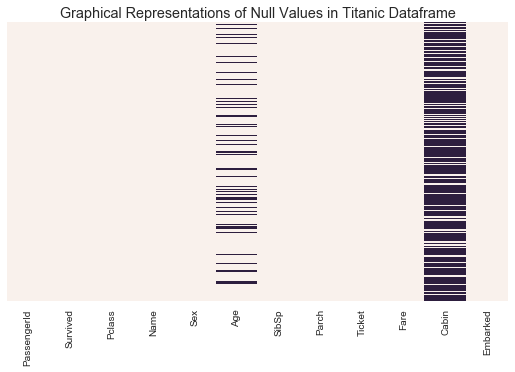

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)   # Visualization of missing data
plt.title('Graphical Representations of Null Values in Titanic Dataframe')

After identifying the missing data, the next step is missing data imputation, detailed data analysis and feature engineering. 


### Embarked

Let's take the easiest column, **Embarked** first to populate the missing values. 

As shown in the above-mentioned missing data stats that there are only two values missing in the *Embarked* column. These two instances are for two ladies, who travelled in "Class 1", together on the same ticket and even shared the Cabin (B28).  

As they were travelling in "Class 1", we can use "groupby" statement to get the port from where most "Class 1" travellers boarded, which is **"S"** or Southampton Port (where **127** passengers from Class-1 travellers were boarded). 

This further confirms by the *"Describe"* table shown above that **"S"** is the most common value in "Embarked" column. Therefore, the missing *Embarked* value will be populated with **"S"**.

In [9]:
titanic[titanic['Embarked'].isnull()]    # This will give us record where there are missing values in "Embarked" column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
titanic[(titanic['Pclass']==1)].groupby('Embarked')['Pclass'].count() # Shows the number of 1st Class passengers by Embarked

Embarked
C     85
Q      2
S    127
Name: Pclass, dtype: int64

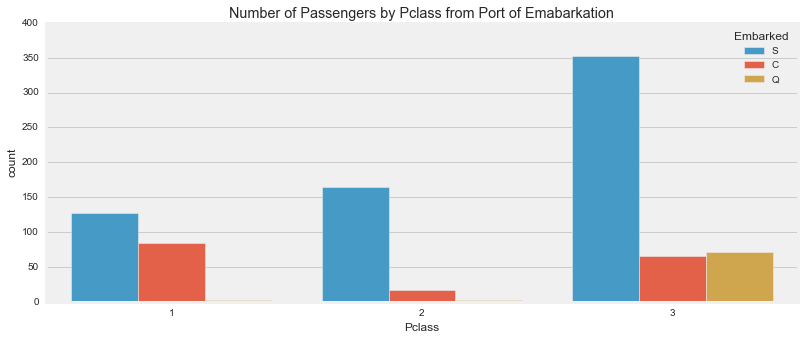

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(data=titanic, x='Pclass', hue='Embarked')
plt.title('Number of Passengers by Pclass from Port of Emabarkation')

In [12]:
titanic['Embarked'].fillna('S',inplace=True) # To impute missing values in "Embarked" column with "S"

In [13]:
 # This will give us the number of missing values within "Embarked" column AFTER fillin

titanic[(titanic['PassengerId'] == 62) | (titanic['PassengerId'] == 830)]   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


Now that all missing values in *Embarked* column have been populated, let's analyse it in detail. 

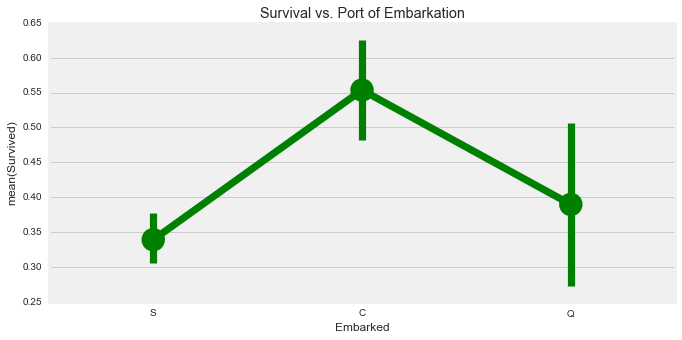

In [14]:
plt.figure(figsize=(10,5))
sns.pointplot(x='Embarked', y='Survived',data=titanic, color='g')  # Overall survival based on port of embark
plt.title('Survival vs. Port of Embarkation')

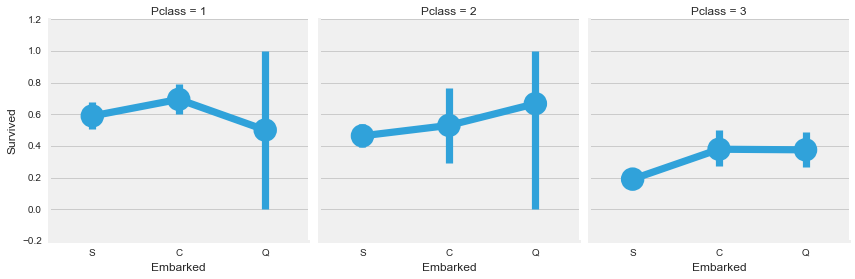

In [15]:
sns.factorplot('Embarked','Survived', col='Pclass',data=titanic) # Survival based on Embarked vs. Pclass

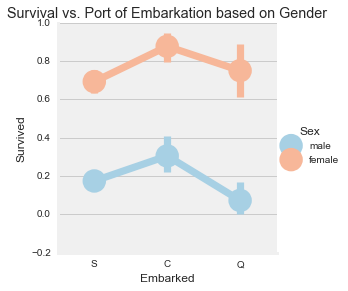

In [16]:
sns.factorplot('Embarked','Survived', hue='Sex', data=titanic, palette='RdBu_r') # Surivial based on port of Embark and gender
plt.title('Survival vs. Port of Embarkation based on Gender')

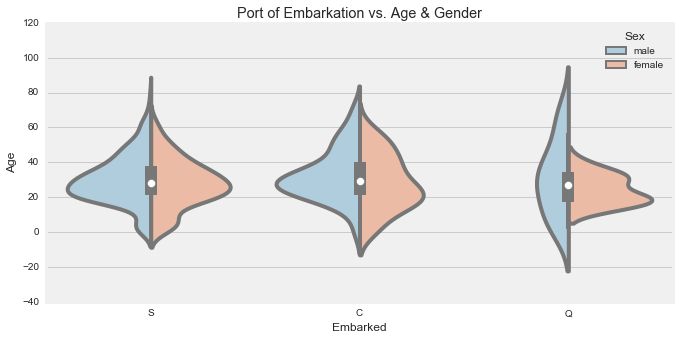

In [17]:
plt.figure(figsize=(10,5))
sns.violinplot(data=titanic, x='Embarked', y= 'Age', hue='Sex',palette='RdBu_r',split=True)
plt.title('Port of Embarkation vs. Age & Gender')

### Age

"Age" column has **177** missing values. But before we populate the missing values, let's first draw a histogram of **Age** with null values. The following histogram shows the mean age is approxiatemly 30 years (taking into account the missing values). The graphs shows that most of the passengers were between **18** and **40** years old.


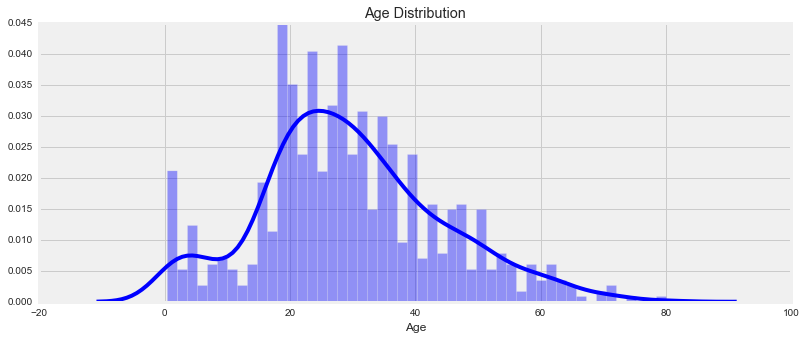

In [18]:
plt.figure(figsize=(12,5))
sns.distplot(titanic['Age'].dropna(),bins=50,color='blue',kde=True)
plt.title('Age Distribution')

In [19]:
print ("Mean Age:   ", titanic.Age.dropna().mean(), "years")   # Calculates the mean age
print ("Median Age: ", titanic.Age.dropna().median(), "years") # Calculates the mediam age

Mean Age:    29.69911764705882 years
Median Age:  28.0 years


There are various ways these missing values can be populated. One common method is to use the average age (mean / median) of passengers, which is approximately 30 and 28 years respectively. However, for this analysis, we cannot not merely use the overall average age because the **"Age"** feature is dependent on many other aspects such as passengers' class **"Pclass"** and **"Sex"**. Let's draw some boxplots to determine average age per passenger class. 


The first graph (on left-side) shows simple boxplot for **Age** against **Pclass** without taking into account **Sex** aspect. The second graph shows age averages based on passengers' gender. 


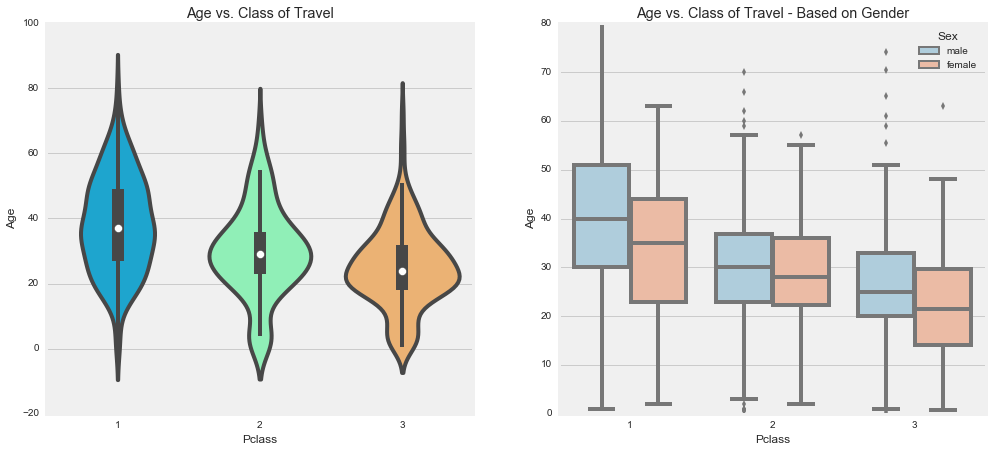

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
sns.violinplot(x = 'Pclass', y = 'Age', data=titanic,palette='rainbow', ax=ax1)
ax1.set(title='Age vs. Class of Travel')

sns.boxplot(x = 'Pclass', y = 'Age', data=titanic, hue='Sex',palette='RdBu_r', ax=ax2)  
ax2.set(title='Age vs. Class of Travel - Based on Gender')
#sns.despine()

We can improve these averages based on passengers' class of travel (**Pclass**) and gender (**Sex**) and a combination of both. 

In [21]:
# Overall average Age per Class
print("Class 1, Overall average age: ",(titanic[titanic['Pclass']==1])['Age'].mean())
print("Class 2, Overall average age: ",(titanic[titanic['Pclass']==2])['Age'].mean())
print("Class 3, Overall average age: ",(titanic[titanic['Pclass']==3])['Age'].mean())

Class 1, Overall average age:  38.233440860215055
Class 2, Overall average age:  29.87763005780347
Class 3, Overall average age:  25.14061971830986


In [22]:
# Average Age per Class based on Gender
print("Class 1, Male average age  : ",(titanic[(titanic['Pclass']==1) & (titanic['Sex']== 'male')])['Age'].mean())
print("Class 1, Female average age: ",(titanic[(titanic['Pclass']==1) & (titanic['Sex']== 'female')])['Age'].mean())
print("Class 2, Male average age  : ",(titanic[(titanic['Pclass']==2) & (titanic['Sex']== 'male')])['Age'].mean())
print("Class 2, Female average age: ",(titanic[(titanic['Pclass']==2) & (titanic['Sex']== 'female')])['Age'].mean())
print("Class 3, Male average age  : ",(titanic[(titanic['Pclass']==3) & (titanic['Sex']== 'male')])['Age'].mean())
print("Class 3, Female average age: ",(titanic[(titanic['Pclass']==3) & (titanic['Sex']== 'female')])['Age'].mean())

Class 1, Male average age  :  41.28138613861386
Class 1, Female average age:  34.61176470588235
Class 2, Male average age  :  30.74070707070707
Class 2, Female average age:  28.722972972972972
Class 3, Male average age  :  26.507588932806325
Class 3, Female average age:  21.75


### Name

However, these averages cannot be used as is to impute missing values in *Age* column. 

Firstly, there were good number of children onboard and we cannot assign above-mentioned average age (e.g. 30 or 28 years) to a child!

But in the given data, there is no single column/feature that can differenciate child from adult passengers, except **Age**, which is what we are trying to impute. Hence, we need to perform **feature engineering** to extract new feature(s). If we closely have a look, one good candidate is passengers' "**Name**". We can get a count of onboard children based on the *titles/salutation* in passengers' names and their ages. This will also help us in further analysis and missing data imputation apart from child passengers.

We can use **Regex(Regular Expressions)** on **"Name"** column to create a new feature/column "**Title**".


In [23]:
titanic['Title'] = titanic.Name.str.extract('([A-Za-z]+)\.',expand=True)

Let's have a quick look at the top three rows to confirm that new feature is added with correct values.

This all looks good. Let's reconfirm this by running a 'value_counts' statement on "**Title**" to check all possible values that we have.

In [24]:
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Ms            1
Don           1
Sir           1
Countess      1
Mme           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

The problem with above-mentioned stats for titles is that the only indicator for a child is the title, "**Master**" (for a male child). As adult females a well as girl child will have the same title "**Miss**", "**Ms.**", "**the Countess**", "**Mme**","**Mlle**", its obvious that *Title* alone cannot be used to determine female child.

Therefore, we rely only on title is "**Master**" to use to determine a Child or adult.

We can calculate the mean age of all missing values for *Age* based on all titles. However, we can combine most of these titles into "Male", "Female", "Child", and "Others" which can then be used to apply average age into missing values.

In [25]:
pd.crosstab(titanic['Title'],titanic['Sex'],margins=True)

Sex,female,male,All
Title,,,
Capt,0,1,1
Col,0,2,2
Countess,1,0,1
Don,0,1,1
Dr,1,6,7
Jonkheer,0,1,1
Lady,1,0,1
Major,0,2,2
Master,0,40,40


In [26]:
# Replacing titles to reduce overall times to Child, Mr, Mrs, Miss, and Other

titanic['Title'].replace(['Master','Ms','Mlle','Mme','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],\
            ['Child','Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [27]:
titanic.Title.value_counts()  # Rechecking whether the changes are made correctly

Mr       529
Miss     186
Mrs      127
Child     40
Other      9
Name: Title, dtype: int64

Now we will calculate passengers' mean age based on the new feature **Title**.

In [28]:
titanic.groupby('Title')['Age'].mean()   # Mean age based on the engineered feature "Title"

Title
Child     4.574167
Miss     21.860000
Mr       32.739609
Mrs      35.981818
Other    45.888889
Name: Age, dtype: float64

Although we can use the above-mentioned average age to impute missing values. However, passengers' travel class also plays an important role in determining the survival. Hence, let's recalculate the mean age based on "Title" and "Pclass".

In [29]:
titanic.groupby(['Title','Pclass'])['Age'].mean()   # Mean age based on "Title" and "Pclass"

Title  Pclass
Child  1          5.306667
       2          2.258889
       3          5.350833
Miss   1         29.625000
       2         22.560606
       3         16.123188
Mr     1         42.171875
       2         32.904762
       3         28.724891
Mrs    1         40.861111
       2         33.682927
       3         33.515152
Other  1         51.333333
       2         43.166667
Name: Age, dtype: float64

In [30]:
# Let's round the above mentioned values to the nearest whole number before imputing into missing/null values of Age column
round(titanic.groupby(['Title','Pclass'])['Age'].mean())

Title  Pclass
Child  1          5.0
       2          2.0
       3          5.0
Miss   1         30.0
       2         23.0
       3         16.0
Mr     1         42.0
       2         33.0
       3         29.0
Mrs    1         41.0
       2         34.0
       3         34.0
Other  1         51.0
       2         43.0
Name: Age, dtype: float64

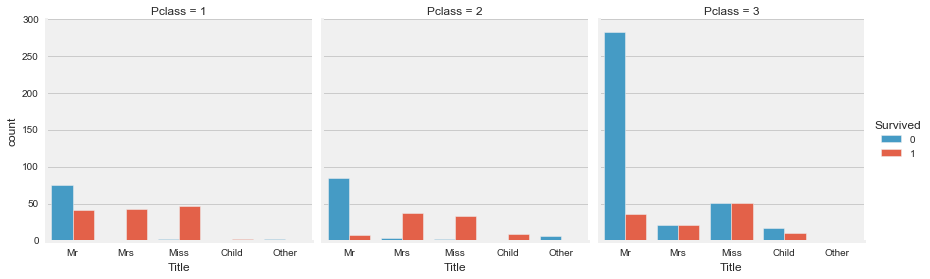

In [31]:
sns.factorplot(data=titanic, x='Title', col = 'Pclass',kind='count',hue='Survived')

### Data Imputation for Age

In [32]:
"""
The following function will be used to populate missing / null values of Age column that are calculated above.

"""

def age_fix(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    Title = cols[2]
    
    if pd.isnull(Age):
        
        if Pclass == 1 and Title == 'Child':
            return 5
        elif Pclass == 2 and Title == 'Child':
            return 2
        elif Pclass == 3 and Title == 'Child':
            return 5
        
        elif Pclass == 1 and Title == 'Miss':
            return 30
        elif Pclass == 2 and Title == 'Miss':
            return 23
        elif Pclass == 3 and Title == 'Miss':
            return 16
        
        elif Pclass == 1 and Title == 'Mr':
            return 42
        elif Pclass == 2 and Title == 'Mr':
            return 33
        elif Pclass == 3 and Title == 'Mr':
            return 29
        
        elif Pclass == 1 and Title == 'Mrs':
            return 41
        elif Pclass == 2 and Title == 'Mrs':
            return 34
        elif Pclass == 3 and Title == 'Mrs':
            return 34
        
        elif Pclass == 1 and Title == 'Other':
            return 51
        elif Pclass == 2 and Title == 'Other':
            return 43
              
        else:
            return Age
    else:
        return Age
    

Finally, let's use the **age_fix** function to impute missing values in *Age* column

In [33]:
titanic['Age'] = titanic[['Age','Pclass','Title']].apply(age_fix,axis=1) #The "age_fix" function is applied to "titanic" dataset

Let's reconfirm that there are no more missing / null values in *Age* column.

In [34]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

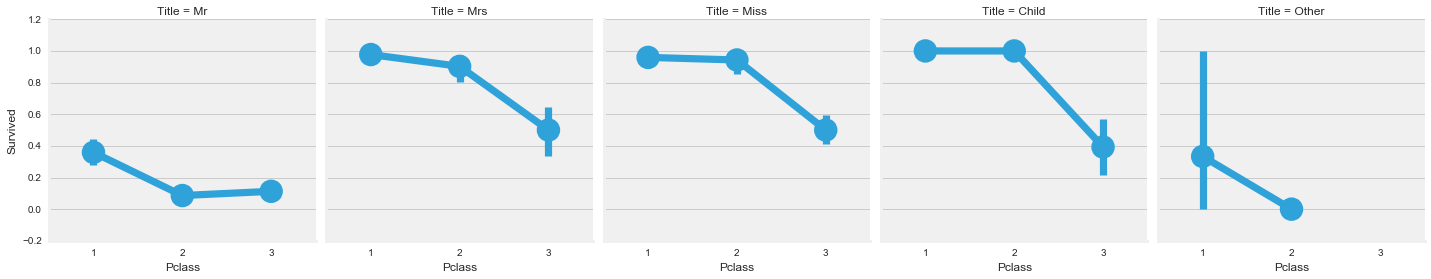

In [35]:
sns.factorplot(x='Pclass',y='Survived',col='Title',data=titanic)

### 'Age' Feature Engineering

Now that we have populated missing values in *Age* feature and have conducted some preliminary analysis, we need to convert *'Age'* to a categorical feature. To achieve this, we need to peform feature engineering to create new feature that can be used for predictive analysis (i.e. machine learning). 

Let's start by getting the describive stats and drawing some tables and graphs.

In [36]:
titanic['Age'].describe(include=all)

count    891.000000
mean      29.463715
std       13.559607
min        0.420000
25%       21.000000
50%       29.000000
75%       36.750000
max       80.000000
Name: Age, dtype: float64

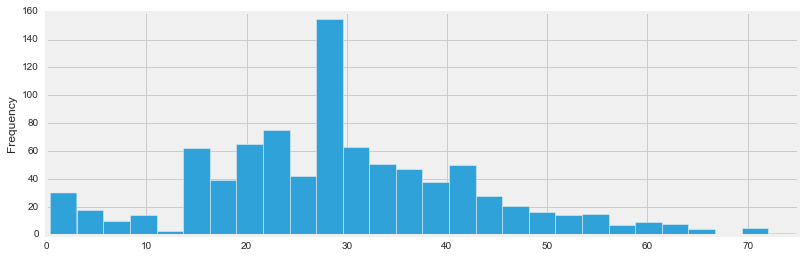

In [37]:
titanic['Age'].plot(kind='hist',bins=30,xlim=(0,75),figsize=(12,4))

Let's create a new feature **'AgeBins'** which will have 5 equal numbers of passengers based on their *Age*.

In [38]:
titanic['AgeBins'] = 0  # New feature "AgeBins" created and an initial value '0' is assigned to it

In [39]:
titanic['AgeBins']=pd.qcut(titanic['Age'],5)  # Divides data into five equal bins

In [40]:
titanic.groupby('AgeBins')['AgeBins'].count()    # Confirms the values in each bin

AgeBins
(0.419, 19.0]    201
(19.0, 26.0]     157
(26.0, 30.0]     181
(30.0, 40.5]     175
(40.5, 80.0]     177
Name: AgeBins, dtype: int64

In [41]:
pd.crosstab(titanic['AgeBins'],titanic['Survived'],margins=True)

Survived,0,1,All
AgeBins,,,
"(0.419, 19.0]",101,100,201
"(19.0, 26.0]",104,53,157
"(26.0, 30.0]",137,44,181
"(30.0, 40.5]",98,77,175
"(40.5, 80.0]",109,68,177
All,549,342,891


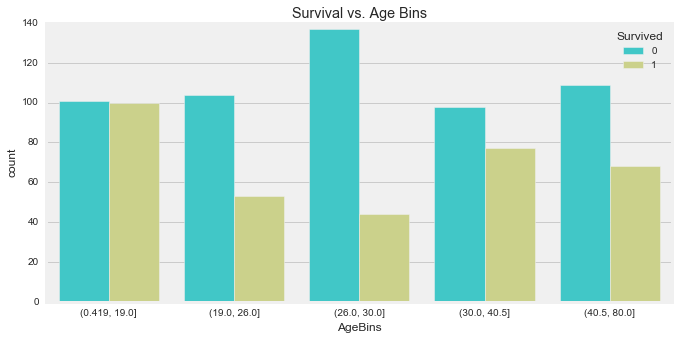

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x='AgeBins',hue='Survived',data=titanic,palette='rainbow')  # AgeBins vs. Survival
plt.title('Survival vs. Age Bins')

In [43]:
pd.crosstab(titanic['AgeBins'],titanic['Survived'],margins=True)

Survived,0,1,All
AgeBins,,,
"(0.419, 19.0]",101,100,201
"(19.0, 26.0]",104,53,157
"(26.0, 30.0]",137,44,181
"(30.0, 40.5]",98,77,175
"(40.5, 80.0]",109,68,177
All,549,342,891


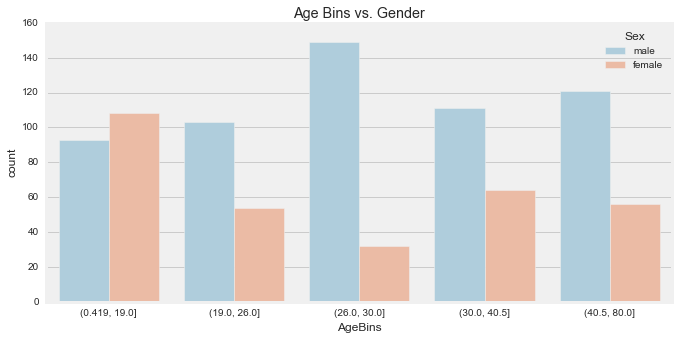

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='AgeBins',hue='Sex',data=titanic,palette='RdBu_r')   # AgeBins vs. Gender (Sex)
plt.title('Age Bins vs. Gender')

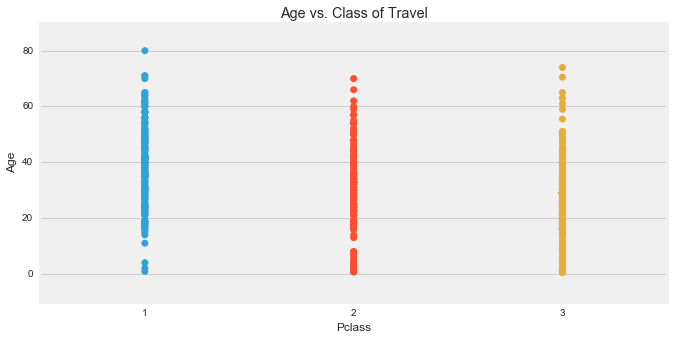

In [45]:
plt.figure(figsize=(10,5))
sns.stripplot(data=titanic, x='Pclass', y= 'Age',size=7)        # Age vs. Pclass
plt.title('Age vs. Class of Travel')

Now, lets create the utimate feature, **'NAge'** for *Age* that we will use in predictive analysis (machine learning).

In [46]:
titanic['NAge'] = 0  # Create a new feature 'NAge' and assign initial value '0'

In [47]:
titanic.loc[titanic['Age']<=19.00,'NAge']=0
titanic.loc[(titanic['Age']>19.00)&(titanic['Age']<=26.00),'NAge']=1
titanic.loc[(titanic['Age']>26.00)&(titanic['Age']<=30.00),'NAge']=2
titanic.loc[(titanic['Age']>30.00)&(titanic['Age']<=40.00),'NAge']=3
titanic.loc[(titanic['Age']>40.00)&(titanic['Age']<=81.00),'NAge']=4


In [48]:
titanic.groupby('NAge')['NAge'].count()   # Confirm values in 'NAge" feature after imputation

NAge
0    201
1    157
2    181
3    173
4    179
Name: NAge, dtype: int64

#### Inshights

  - The youngest passenger was approximately **5 month** old (*0.42 years*)
  - The eldest one was **80 years** old and was saved!
  - Overall average age (mean) was **29.46** years.
 - Being a Child will give the best chance of survival, especially if you are in Class 1 or Class 2.
  - Female passengers (regardless of married or single) are also showing a similar pattern, i.e. best chances of survival in Class 1 and Class 2 whrease less in Class 3 but still better than Male passengers.
  - Male passengers' had least chances of survival regardless of their age. 
  

### Child

Now that **Age** column is completed populated with missing values, let's create another feature **"Child"** based on the criteria that all passengers with Age less than or equal to 16 years and title is not "Mrs". There were **"135"** passengers that we can termed as "Child" based on this criteria.

The reason for exclusion based on title "Mrs" is because there were two female passengers aged 14 and 15 and their titles were 'Mrs' (as shown below).


In [49]:
titanic[(titanic['Age'] <= 16) & (titanic['Title'] == 'Mrs')]   # Child brides?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBins,NAge
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,"(0.419, 19.0]",0
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,Mrs,"(0.419, 19.0]",0


In [50]:
titanic[(titanic['Age'] <= 16) & (titanic['Title'] !='Mrs')]['Age'].count()   # Count of Child Passengers

135

In [51]:
titanic['Child'] = 0    # Creates a new feature "Child" and assigns initial value '0'

In [52]:
# Assigns value '1' to all Children based on the above-mentioned criteria
titanic.loc[(titanic['Age'] <= 16) & (titanic['Title'] !='Mrs'),'Child'] = 1 

In [53]:
titanic.Child.value_counts()   # Reconfirms that values have been successfully put

0    756
1    135
Name: Child, dtype: int64

In [54]:
pd.crosstab(titanic['Child'],titanic['Survived'],margins=True)    # Survived vs. Child

Survived,0,1,All
Child,,,
0,488,268,756
1,61,74,135
All,549,342,891


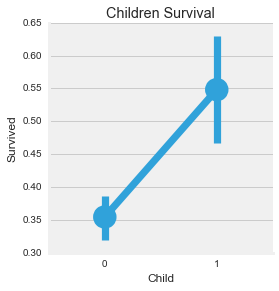

In [55]:
sns.factorplot('Child','Survived',data=titanic)       # Children surived vs. died
plt.title('Children Survival')

### Cabin

The **Cabin** column has significantly large number of missing values, i.e. **687** which is approximately **77%** of the total data. There is a possibility to peform some **feature engineering** to extract meaniningful data from the available *Cabin* values. 

It looks like that the first character in the Cabin numbers is indicating the Deck, which might be useful in our analysis. Let's create a new feature/column **"Deck"** using the first character of Cabin Number.


In [56]:
titanic['Deck'] = titanic['Cabin'].astype(str).str[0]  # Extracting first character in "Cabin" to create a new column "Deck"

Let's quickly check first few rows in the *titanic* dataset to see how the new feature looks like. Please note that the "NaN' values will appear with a small **"n"**.

In [57]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBins,NAge,Child,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(19.0, 26.0]",1,0,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30.0, 40.5]",3,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(19.0, 26.0]",1,0,n


In [58]:
titanic.Deck.value_counts()  # Gives the count for each value in the "Deck" column

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [59]:
pd.crosstab(titanic['Deck'],titanic['Survived'],margins=True)

Survived,0,1,All
Deck,,,
A,8,7,15
B,12,35,47
C,24,35,59
D,8,25,33
E,8,24,32
F,5,8,13
G,2,2,4
T,1,0,1
n,481,206,687


The above-mentioned value count in Deck column shows that although we can use the cabin initials **(A to G and T)** to create dummy variables. However, determining the Deck for missing **687** values will be very arbitrary. The crosstab table shows that only **30%** passengers with **"NaN"** values survived. However, we can perform **feature engineering** to create a new feature **"IsCabin"** to indicate whether or not the cabin is available.

In [60]:
titanic['IsCabin'] = 1 # Create a new feature "IsCabin" and assign a default value "1"

In [61]:
titanic.loc[titanic['Cabin'].isnull(),'IsCabin'] = 0  # Populate "IsCabin" with value '0' where "Cabin" is Null/NaN

In [62]:
titanic.loc[titanic['Cabin'].isnull(),'IsCabin'] = 0  # Populate "IsCabin" with value '0' where "Cabin" is Null/NaN

In [63]:
titanic['IsCabin'].value_counts()  # Calculate values in 'IsCabin' feature

0    687
1    204
Name: IsCabin, dtype: int64

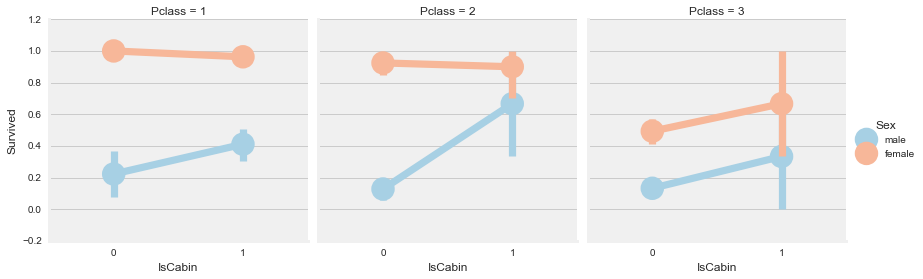

In [64]:
sns.factorplot(x='IsCabin',y='Survived',col='Pclass',hue='Sex',data=titanic, palette='RdBu_r')

### Pclass


Passengers' class of travel (**Pclass**) had significant impact on survival chances. Some of these have already been mentioned in the combination of other features, such as *Title*. Let's plot some more graphs to dipict the analysis on *Pclass*.

Let's first count the passengers travelled in each class and the number of passengers survived and died per class of travel.

In [65]:
pd.crosstab(titanic['Pclass'],titanic['Survived'],margins=True,) # Passengers survived vs. died based on Pclass feature

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


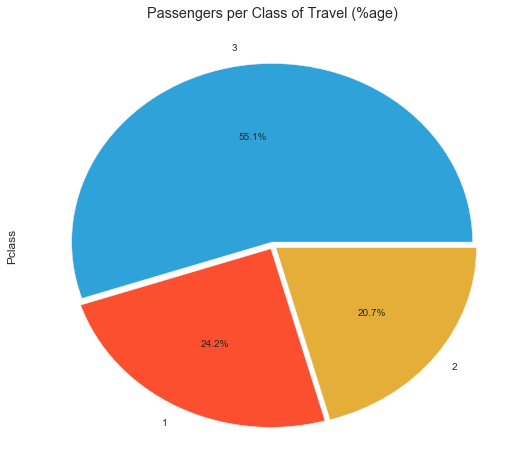

In [66]:
 # Percentage of passengers travelled per class of travel
titanic['Pclass'].value_counts().plot.pie(explode=[0.02,0.02,0.02],autopct='%1.1f%%',figsize=(8,8))
plt.title('Passengers per Class of Travel (%age)')


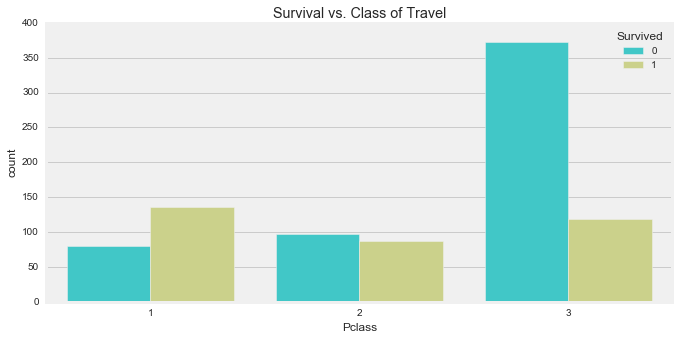

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass',hue='Survived',data=titanic,palette='rainbow')    # Survived vs. Died per class of travel
plt.title('Survival vs. Class of Travel')

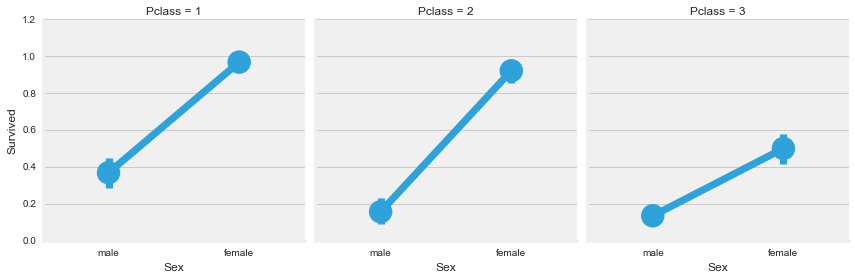

In [68]:
plt.figure(figsize=(8,5))
sns.factorplot(x='Sex',y='Survived',col='Pclass',data=titanic)

This clearly shows that social status (procured through wealth) does play important role. Passengers in Class-1 had the highest survival rate, i.e. **63%**. Class-2 had almost equal ratio of survival vs. died (**47%** to be precise). Whrease mortality rate was very high in Class-3, i.e. only **24%** survived.

### SibSp

*SibSp* feature shows the number of siblings travelled together. Let's plot some graphs and analyse the data to determine it's impact on passengers' survival.

In [69]:
pd.crosstab(titanic['SibSp'],titanic['Survived'],margins=True) # Passengers survived vs. died based on SibSp feature

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


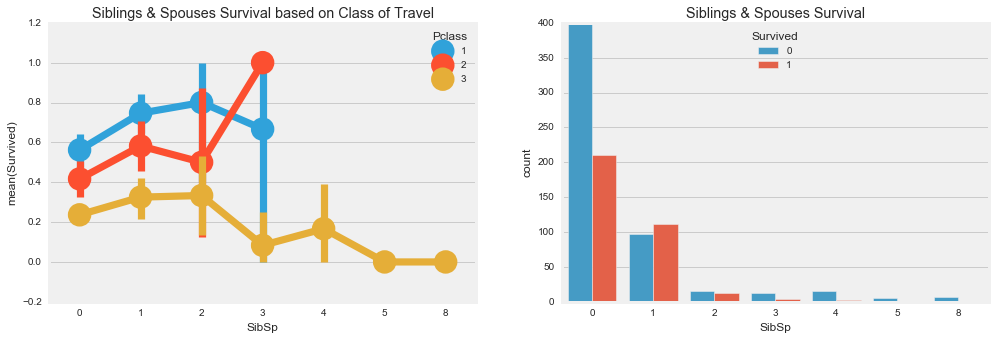

In [70]:
 # Graphical representation of passengers survived vs. die based on Siblings and Spouses  
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.pointplot('SibSp','Survived',hue='Pclass',data=titanic,ax=ax1)
ax1.set(title='Siblings & Spouses Survival based on Class of Travel')
sns.countplot(x='SibSp',data=titanic,hue='Survived',ax=ax2) 
ax2.set(title='Siblings & Spouses Survival')

In [71]:
pd.crosstab(titanic['SibSp'],titanic['Pclass'])

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Although it might be true that there is safety in numbers, Titanic passengers' data showed a strage pattern. 68% passengers were travelling alone, out of which only 35% survived! There is 54% survival rate of passengers with only one sibling or spouse followed for 46% survival rate for passengers with three siblings / spouse. From that point onwards, the survival rate diminishes as the SibSp number increases. 

But the most important phenomenon is that all large familities (more than 3 siblings / spouses) were travelleing in Class-3, which has very high mortality rate.



### Parch

*Parch* feature shows the number of parents and children travelled together. Let's plot some graphs and analyse the data to determine it's impact on passengers' survival.

In [72]:
pd.crosstab(titanic['Parch'],titanic['Survived'],margins=True) # Passengers survived vs. died based on Parch feature

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


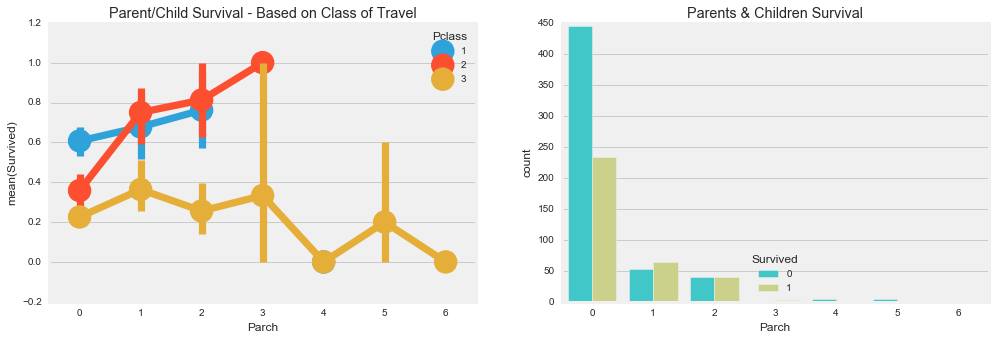

In [73]:
 # Graphical representation of passengers survived vs. die based on Siblings and Parch  
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.pointplot('Parch','Survived',hue='Pclass',data=titanic,ax=ax1)
ax1.set(title='Parent/Child Survival - Based on Class of Travel')
sns.countplot(x='Parch',data=titanic,hue='Survived',ax=ax2, palette='rainbow') 
ax2.set(title='Parents & Children Survival')

In [74]:
pd.crosstab(titanic['Parch'],titanic['Pclass'])

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Parent-Child (*Parch*) feature shows a similar trend as we have observed in *SibSp* above. Overall, 76% passengers were travelling without any parent or child, out which 34% survived. There was 55% survival rate for the passengers who were travelleing with at leaset on child or parent and 50% survival rate is observed for those who were travelling with two children or both parents. From that point onwards, the number of passengers become very low and therefore insignificant who were travelling with more than three children or parents.

Moreover, exactly like SibSp, all large familities (more than 2 parents/child) were travelleing in Class-3, which has very high mortality rate.

### Feature Engineering on 'SibSp' and 'Parch' features

As observed in **SibSp** and **Parch** analysis, we can conclude that:
  
  - Most of the large families travelled in Class-3
  - Most large familities did not surivive
  - Most people that were travelling alone also did not survive

Hence, we can perform **feature engineering** to create two new features, i.e. **FamSize** and **Alone**. 

### FamSize (Family Size)

**FamSize** will have the combination of *Parch* and *SibSp* values.



In [75]:
#Creating new feature "FamSize" by adding values in "SibSp" and "Parch"

titanic['FamSize'] = titanic['SibSp'] + titanic['Parch'] 

Let's reconfirm the changes have been done successfully by running the *value_counts()* statement.

In [76]:
titanic.FamSize.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: FamSize, dtype: int64

In [77]:
pd.crosstab(titanic['Survived'],titanic['FamSize'],margins=True)  # Survival vs. family size feature

FamSize,0,1,2,3,4,5,6,7,10,All
Survived,,,,,,,,,,
0,374,72,43,8,12,19,8,6,7,549
1,163,89,59,21,3,3,4,0,0,342
All,537,161,102,29,15,22,12,6,7,891


### Alone

**Alone** will have only two values:

  - '0' means not alone
  - '1' mean alone

In [78]:
titanic['Alone'] = 0  # Creating a new feature "Alone" with default value = 0

In [79]:
titanic.loc[titanic['FamSize']== 0,'Alone'] = 1  # Populate "Alone" with value '1' where family size is '0'

Let's reconfirm the changes have been done successfully by running the *value_counts()* statement.

In [80]:
titanic.Alone.value_counts()

1    537
0    354
Name: Alone, dtype: int64

In [81]:
pd.crosstab(titanic['Alone'],titanic['Survived'],margins=True)  # Survival vs. Alone feature

Survived,0,1,All
Alone,,,
0,175,179,354
1,374,163,537
All,549,342,891


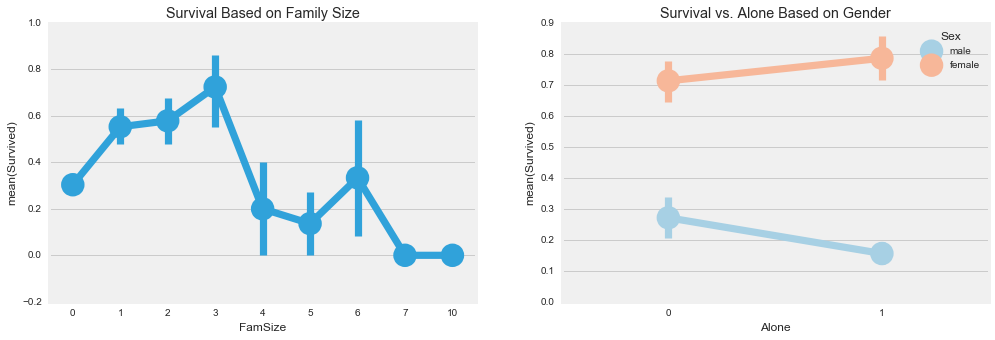

In [82]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.pointplot('FamSize','Survived',data=titanic,ax=ax1)
ax1.set(title='Survival Based on Family Size')
sns.pointplot('Alone','Survived',hue='Sex',data=titanic,palette='RdBu_r',ax=ax2)
ax2.set(title='Survival vs. Alone Based on Gender')

### Sex

As we have observed in the above-mentioned analysis for various features that passengers' *gender* (**Sex**) played a key role in determining the chances of survival.

Overall, there were 35% females and 65% males onboard (based on 891 records) out of which 74% females and only 19% males survived the disaster! 

It will be interesting to draw some tabels and plot some graphs to see the relationship of *Sex* feature with other features.


In [83]:
pd.crosstab(titanic['Sex'],titanic['Survived'],margins=True)  # Survival vs. gender (Sex)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


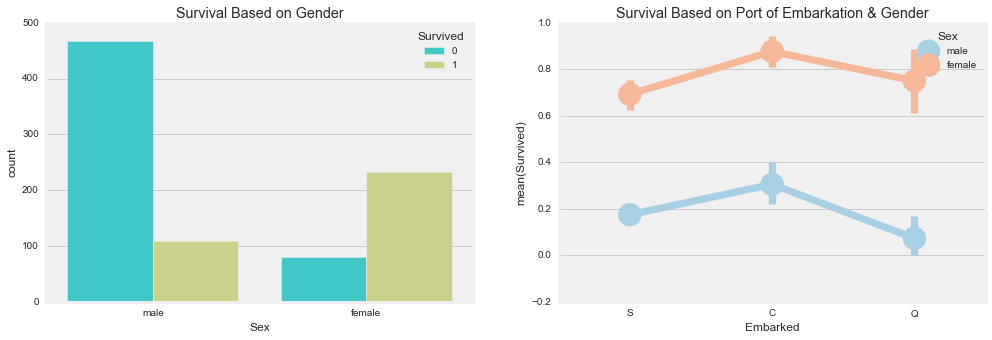

In [84]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Sex',data=titanic,hue='Survived',palette='rainbow',ax=ax1)
ax1.set(title='Survival Based on Gender')
sns.pointplot(x='Embarked',y='Survived',hue='Sex',data=titanic, palette='RdBu_r',ax=ax2)
ax2.set(title='Survival Based on Port of Embarkation & Gender')

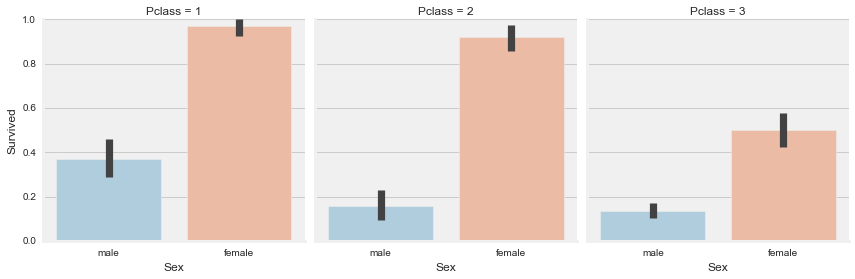

In [85]:
sns.factorplot('Sex','Survived', col='Pclass',data=titanic,kind='bar',palette='RdBu_r') 

### Fare

Fare is a continuous feature that has verious diverse amounts regardless of class of travel. The highest fare paid by passenger was '**512.32**' and lowest fare was **zero**. There are three counts of the highest *512.32* fare, paid on the same ticket "PC 17755" and therefore it's most likely a typo. 

As it's obvious that higher class passengers had paid highest fare and because Class-1 passengers had highest survival rate, followed by Class-2, we can easily deduced that *Fare* has significant impact on determining chances of survival.


In [86]:
titanic['Fare'].describe(include=all) # Descriptive stats for "Fare"

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [87]:
titanic[titanic['Fare'] >= 300]  # Passengers paid more than 300 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBins,NAge,Child,Deck,IsCabin,FamSize,Alone
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,"(30.0, 40.5]",3,0,n,0,0,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,"(30.0, 40.5]",3,0,B,1,1,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,"(30.0, 40.5]",3,0,B,1,0,1


Let' draw distribution charts for *'Fare'* to see the dispersion across the dataset.

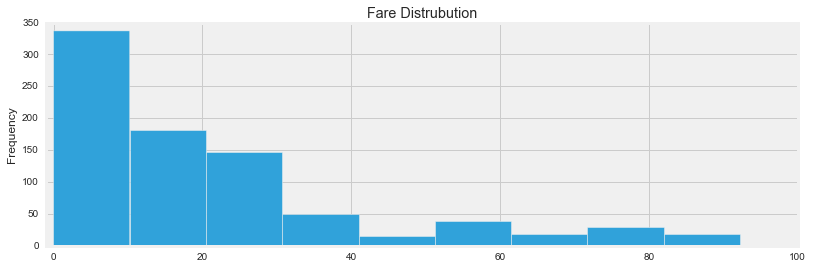

In [88]:
titanic['Fare'].plot(kind='hist',bins=50,xlim=(-1,100),figsize=(12,4))
plt.title('Fare Distrubution')

The historgram shows that *'Fare'* is right-skewed, i.e. it has a long tail on the right side. Most passengers paid between 5 to 15, which aligns with the higher number of Class-3 passengers. The values diminishes as we move towards right with occassional values in the higher bins. 

As *'Fare'* is a continuous variable, we have to convert it into categorical variable for our machine learning phase. Therefore, we have to perform yet another **feature engineering** to create a new feature **FareBins** that will have different ranges of Fare. 



In [89]:
titanic['FareBins']=pd.qcut(titanic['Fare'],4)  # Divides data into equal bins

In [90]:
titanic.groupby('FareBins')['FareBins'].count()  # Confirms the values in each bin

FareBins
(-0.001, 7.91]     223
(7.91, 14.454]     224
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: FareBins, dtype: int64

In [91]:
titanic['NFare'] = 0  # Creates a feature 'NFare' and assign an initial value '0'

Now, let's assign a value (from 0 to 3) based on the *'FareBins'*

In [92]:
titanic.loc[titanic['Fare']<=7.91,'NFare']=0
titanic.loc[(titanic['Fare']>7.91)&(titanic['Fare']<=14.454),'NFare']=1
titanic.loc[(titanic['Fare']>14.454)&(titanic['Fare']<=31),'NFare']=2
titanic.loc[(titanic['Fare']>31)&(titanic['Fare']<=513),'NFare']=3

In [93]:
pd.crosstab(titanic['NFare'],titanic['Survived'],margins=True)  # Survived vs. NFare

Survived,0,1,All
NFare,,,
0,179,44,223
1,150,67,217
2,127,102,229
3,93,129,222
All,549,342,891


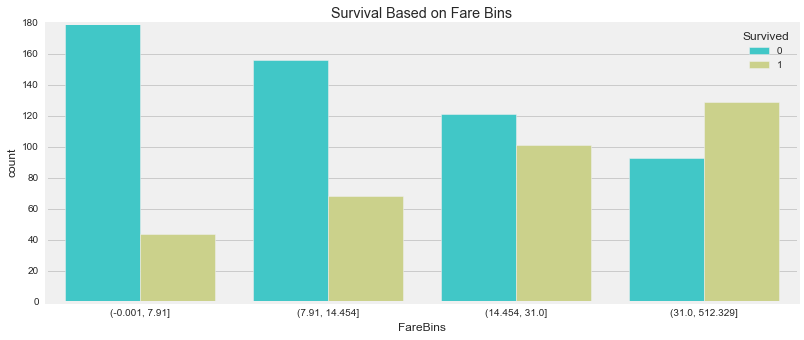

In [94]:
plt.figure(figsize=(12,5))
sns.countplot(x='FareBins',hue='Survived',data=titanic,palette='rainbow')
plt.title('Survival Based on Fare Bins')

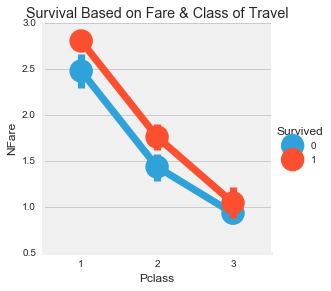

In [95]:
sns.factorplot('Pclass','NFare',data=titanic, hue='Survived')
plt.title('Survival Based on Fare & Class of Travel')

To conclude, after feature engineering, it's obvious that as the *NFare* value increases, the chances of survival also increase. This nicely complements with the "Pclass" vs. "NFare" that also proves that as the 'Pclass' increases 'NFare' also increases.

### Ticket

*Ticket* feature contains the ticket number of passengers. In some cases, it's a mix of strings and numbers whrease in most of the cases only numbers are given. Let's analyse it in detail to determine whether or not it has any impact on passengers' survival.

In [96]:
titanic['Ticket'].value_counts().head(20)   # A quick value count of "Ticket"

CA. 2343        7
1601            7
347082          7
CA 2144         6
347088          6
3101295         6
S.O.C. 14879    5
382652          5
19950           4
LINE            4
113781          4
2666            4
349909          4
W./C. 6608      4
113760          4
17421           4
347077          4
PC 17757        4
4133            4
C.A. 34651      3
Name: Ticket, dtype: int64

Well, it looks like several passengers travelled on single ticket, which can be used to do extract a new feature "**SharedTicket**" to show whether or not a family travelled on a single. The values will be as follows:
  - '0' means Individual Passenger / ticket not shared
  - '1' means Shared Ticket (used by a group of passengers)

In [97]:
titanic['SharedTicket']= 0 # A new feature "FanTicket" created with initial value "0"

Precisely, **547** passengers' travelled alone (*which aligned to FamSize=0 calculated above*) and remaining **344** passengers travelled on **134** shared tickets as calculated below.  

In [98]:
ticketV = titanic['Ticket'].value_counts()  #Calculates passengers groups on each tickets and assign it to a variable 'ticketV'
ticketV.head(2)

CA. 2343    7
1601        7
Name: Ticket, dtype: int64

In [99]:
single = ticketV.loc[ticketV ==1].index.tolist()  # Creates a list of tickets used by individual(single) passemgers
multi  = ticketV.loc[ticketV > 1].index.tolist()  # Creates a list of tickets shared by group of passemgers

In [100]:
print("Number of Individual Tickets: ", len(multi))     # Prints individual tickets count
print("Number of Shared Tickets    : ", len(single))    # Prints shared tickets count

Number of Individual Tickets:  134
Number of Shared Tickets    :  547


It's time to plugin values (**'0'** *or* **'1'**) in **'SharedTicket'** feature based on **'single'** or **'multi'**. As we have already assigned the initial value *'0'* to "*SharedTicket*" feature, we will only plugin '*1*' for '*multi*' variable as calculated above.

In [101]:
# Compares the ticket number in the "multi" list that was created above with titanic dataset "Ticket" feature and plugin '1'
for ticket in multi:
    titanic.loc[titanic['Ticket'] == ticket, 'SharedTicket'] = 1
    

In [102]:
titanic['SharedTicket'].value_counts() # Checks the values in "SharedTicket" column to confirm the accuracy of imputation

0    547
1    344
Name: SharedTicket, dtype: int64

In [103]:
pd.crosstab(titanic['SharedTicket'],titanic['Survived'],margins=True) # Survived vs. SharedTicket

Survived,0,1,All
SharedTicket,,,
0,384,163,547
1,165,179,344
All,549,342,891


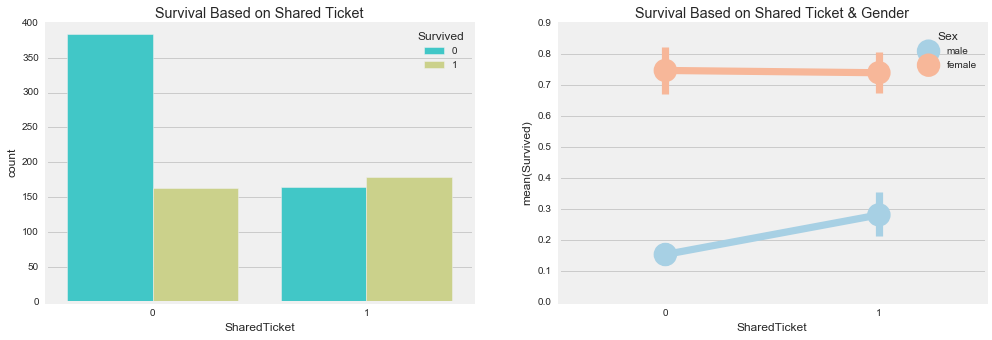

In [104]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='SharedTicket',data=titanic,hue='Survived',palette='rainbow',ax=ax1)
ax1.set(title='Survival Based on Shared Ticket')
sns.pointplot(x='SharedTicket',y='Survived',hue='Sex',data=titanic, palette='RdBu_r',ax=ax2)
ax2.set(title='Survival Based on Shared Ticket & Gender')

In [105]:
pd.crosstab(titanic['SharedTicket'],titanic['Pclass'],margins=True) # Pclass vs. SharedTicket

Pclass,1,2,3,All
SharedTicket,,,,
0,97,107,343,547
1,119,77,148,344
All,216,184,491,891


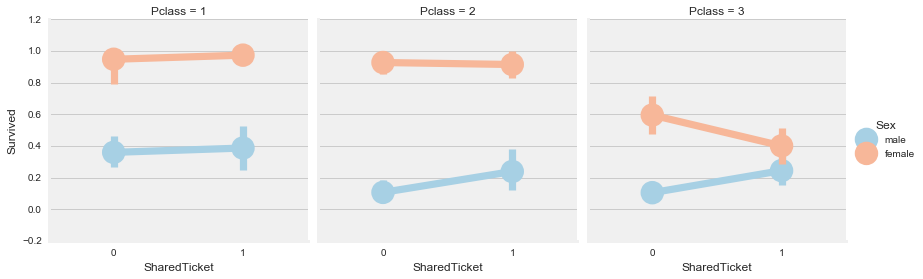

In [106]:
# Survival based on SharedTicket vs. Pclass taking into account the gender (Sex)
sns.factorplot('SharedTicket','Survived', col='Pclass',hue='Sex',data=titanic, palette='RdBu_r') 

Overall, **39%** passengers travelled on shared tickets out of which **52%** survived. Whrease **61%** passengers travelled on invididual tickets (alone) and only **30%** were survived. However, we still cannot deduce that travelleing together had more chances of survival. There are many other facts that played the role in determine survival. For example, class of travel (*'PClass'*). As most passengers in Class-1 and Class-2 survived, we can see in the above table (*PClass vs. SharedTicket*) that proportionately most shared ticket passengers (**49%**) were from Class-1 and Class-2 as compared to Class-3 **30%** passengers who were travelleing on the same ticket.

## 6. Data Cleaning & Dummy Variables

Quite a lot has been done in Section-5. It's time to get our data cleansed and ready for predictive modeling. This will include creation of Dummy Variables, removing unwanted features and convertion of those features that contain non-numeric values to numerica values. But first let start with preliminary sanity checks.  

In [107]:
titanic.shape   # Our dataset now contains 23 features, most of which are not required for predictive modeling.

(891, 23)

In [108]:
titanic.info()  # Overview of dataset features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        891 non-null object
Title           891 non-null object
AgeBins         891 non-null category
NAge            891 non-null int64
Child           891 non-null int64
Deck            891 non-null object
IsCabin         891 non-null int64
FamSize         891 non-null int64
Alone           891 non-null int64
FareBins        891 non-null category
NFare           891 non-null int64
SharedTicket    891 non-null int64
dtypes: category(2), float64(2), int64(12), object(7)
memory usage: 148.1

In [109]:
titanic.head()   # First five rows of titanic dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,AgeBins,NAge,Child,Deck,IsCabin,FamSize,Alone,FareBins,NFare,SharedTicket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,"(19.0, 26.0]",1,0,n,0,1,0,"(-0.001, 7.91]",0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,"(30.0, 40.5]",3,0,C,1,1,0,"(31.0, 512.329]",3,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,"(19.0, 26.0]",1,0,n,0,0,1,"(7.91, 14.454]",1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,"(30.0, 40.5]",3,0,C,1,1,0,"(31.0, 512.329]",3,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,"(30.0, 40.5]",3,0,n,0,0,1,"(7.91, 14.454]",1,0


### Creation of Dummy Variables

Let's first create Dummy Variable for **"Embarked"** and **"Sex"** features.


In [110]:
int1 = titanic.copy()

In [111]:
int1.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
Title             0
AgeBins           0
NAge              0
Child             0
Deck              0
IsCabin           0
FamSize           0
Alone             0
FareBins          0
NFare             0
SharedTicket      0
dtype: int64

In [112]:
emb  = pd.get_dummies(titanic['Embarked'],drop_first=True) #Creates two Dummy Varable "Q" and "C" and drops the values for "S"   
nsex = pd.get_dummies(titanic['Sex'],drop_first=True)     #Creates Dummy Varable "male" and drops the values for Female


Now, lets Concatenate the newly created Dummy Variables with titanic dataframe

In [113]:
titanic = pd.concat([titanic,emb],axis=1)  # Concatenate titanic dataset with emb
titanic = pd.concat([titanic,nsex],axis=1)  # Concatenate titanic dataset with nsex

Let's check the shape of the titanic dataset after creating dummy variables, which shows that three new features have been added.

In [114]:
titanic.shape

(891, 26)

### Convertion to Numeric Values

**"Title"** feature contains strings that cannot be used for machine learning. We need to convert it to numeric values.

In [115]:
titanic['Title'].replace(['Mr','Mrs','Miss','Child','Other'],[0,1,2,3,4],inplace=True)


### Removal of Unwanted Features

We are not ready to cleanse data and remove all those features that we do not required. But, before we remove them, let's quickly have a look at all of them.

    -'PassengerId'  : It's not required for our predictive modelling and hence will be removed.  
    -'Survived'     : This is the "Target Variable" and therefore we will retain it.
    -'Pclass'       : We will retain passenger's class of travel (Pclass).
    -'Name'         : We have already extract other key features out of it. Hence, this will be removed.
    -'Sex'          : We have created dummy variable "male" from it and hence, it will be removed.
    -'Age'          : We have extracted "NAge" from it and hence it will be removed.
    -'SibSp'        : We have combined it with "Parch" to create "FamSize" and "Alone" features. Hence, it will be removed. 
    -'Parch'        : We have combined it with "SibSp" to create "FamSize" and "Alone" features. Hence, it will be removed.
    -'Ticket'       : This will be removed as we extract "SharedTicket" from this feature.
    -'Fare'         : This will be removed as we have extracted new feature "NFare" from it.
    -'Cabin'        : This will be removed as we have extracted new feature "IsCabin" from it.
    -'Embarked'     : This will be removed as we have created two dummy features ("Q' and "S") from it.
    -'Title'        : This is our extracted feature and will be kept.
    -'Deck'         : This was an interim feature that we extracted from 'Cabin' to create "IsCabin". Hence will be removed.
    -'FamSize'      : This is our extracted feature and will be kept.
    -'Alone'        : This is our extracted feature and will be kept.
    -'IsCabin'      : This is our extracted feature and will be kept.
    -'SharedTicket' : This is our extracted feature and will be kept.
    -'FareBins'     : This is our extracted feature and will be kept.
    -'NFare'        : This is our extracted feature and will be kept.
    -'AgeBins'      : This was an interim feature that we extracted from Age to create "NAge". Hence will be removed.
    -'Child'        : This is our extracted feature and will be kept.
    -'Q'            : This is our extracted feature and will be kept.
    -'S'            : This is our extracted feature and will be kept.
    -'male'         : This is our extracted feature and will be kept.  

In [116]:
# Removes unwanted features
titanic.drop(['PassengerId','Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',\
              'AgeBins','Deck', 'FareBins', ],inplace=True,axis=1)      

### Correlation Chart
Now that we have the clean dataset, ready for predictive modelling, let's plot a final graph to see the correlation among all remaining features.

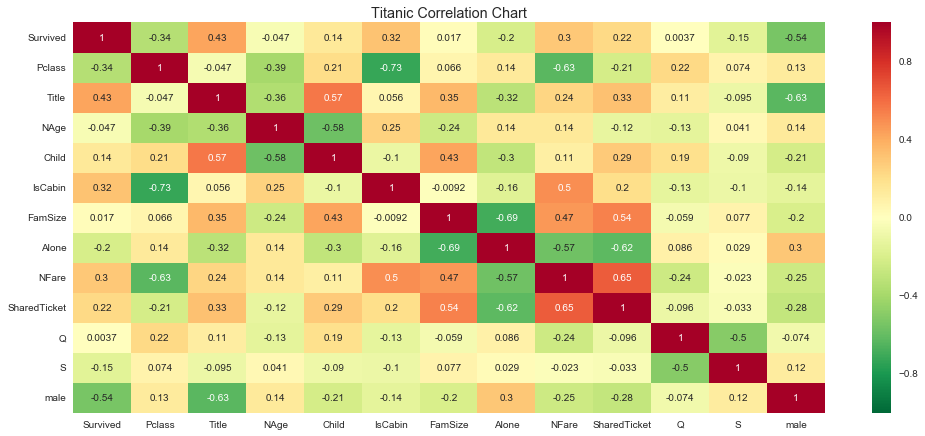

In [117]:
plt.figure(figsize=(15,7))
sns.heatmap(titanic.corr(),cmap='RdYlGn_r',annot=True)
plt.title('Titanic Correlation Chart')

## 7. Predictive Modelling / Machine Learning

Finally, our data is all set and we are eventually ready for Predictive Modelling / Machine Learning. We will use the following machine algorithms for Predictive Modelling:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Machine (Linear & rbc)
5. K-Nearest Neightbors

However, let's start to have a quick look at our final dataset.

In [118]:
titanic.shape

(891, 13)

In [119]:
titanic.head(2)

,Survived,Pclass,Title,NAge,Child,IsCabin,FamSize,Alone,NFare,SharedTicket,Q,S,male
0,0,3,0,1,0,0,1,0,0,0,0,1,1
1,1,1,1,3,0,1,1,0,3,0,0,0,0


### Creation of Predictor & Target Variables
It all looks good. Let's now spilit the data into X (predictors) and y (target) variables.

In [120]:
y = titanic['Survived']                             # Target variable
X = titanic.drop('Survived',inplace=False,axis=1)   # Predictors

In [121]:
X.head(2)         # Header of the Predictor Variable (X)

,Pclass,Title,NAge,Child,IsCabin,FamSize,Alone,NFare,SharedTicket,Q,S,male
0,3,0,1,0,0,1,0,0,0,0,1,1
1,1,1,3,0,1,1,0,3,0,0,0,0


In [122]:
y.head(2)       # Header of the Target Variable (y)

0    0
1    1
Name: Survived, dtype: int64

### Data Split - Training & Test Data
Let's now split the data into Test and Train datasets (within *titanic* dataset).
Let's import Scikit-Learn libarary and perform the split.


In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)   # A 25-70 split of Test and Train data


Let's confirm that count of train and test data split.

In [124]:
print ("'X_train', train data count : ", X_train.shape)
print ("'X_test', test data count   : ", X_test.shape)

'X_train', train data count :  (668, 12)
'X_test', test data count   :  (223, 12)


And, finally, let's apply different machine learning algorithms to determine the accuracy of our predictions.

### Logistic Regression

#### Model Creation, Training and Prediction

In [125]:
from sklearn.linear_model import LogisticRegression      # Importing of Logistic Regression Library from Scikit-Learn
lr = LogisticRegression()                                # Creation of Logistic Regression Model    
lr.fit(X_train,y_train)                                  # Model Training
lr_pred = lr.predict(X_test)                             # Prediction based on X_test

#### Validation - Logistic Regression

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report   # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,lr_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,lr_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,lr_pred))        # Classification Report 


Accuracy Score =  0.780269058296

Confusion Matrix: 
 [[120  19]
 [ 30  54]]

Classification Report: 
              precision    recall  f1-score   support

          0       0.80      0.86      0.83       139
          1       0.74      0.64      0.69        84

avg / total       0.78      0.78      0.78       223



### Decision Tree Classifier

#### Model Creation, Training and Prediction

In [127]:
from sklearn.tree import DecisionTreeClassifier          # Importing of Logistic Regression Library from Scikit-Learn
dt = DecisionTreeClassifier()                            # Creation of Decision Tree Classifier Model   
dt.fit(X_train,y_train)                                  # Model Training
dt_pred = dt.predict(X_test)                             # Prediction based on X_test

#### Validation - Decision Tree

In [128]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report   # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,dt_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,dt_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,dt_pred))        # Classification Report 


Accuracy Score =  0.780269058296

Confusion Matrix: 
 [[125  14]
 [ 35  49]]

Classification Report: 
              precision    recall  f1-score   support

          0       0.78      0.90      0.84       139
          1       0.78      0.58      0.67        84

avg / total       0.78      0.78      0.77       223



### Random Forest Classifier 

#### Model Creation, Training and Prediction

In [129]:
from sklearn.ensemble import RandomForestClassifier      # Importing of Logistic Regression Library from Scikit-Learn
rfc = RandomForestClassifier(n_estimators=100)           # Creation of Random Forest Classifier Model  
rfc.fit(X_train,y_train)                                 # Model Training
rfc_pred = rfc.predict(X_test)                           # Prediction based on X_test

#### Validation - Random Forest

In [130]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report    # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,rfc_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,rfc_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,rfc_pred))        # Classification Report 


Accuracy Score =  0.780269058296

Confusion Matrix: 
 [[126  13]
 [ 36  48]]

Classification Report: 
              precision    recall  f1-score   support

          0       0.78      0.91      0.84       139
          1       0.79      0.57      0.66        84

avg / total       0.78      0.78      0.77       223



### Support Vector Machine (rbf)

#### Model Creation, Training and Prediction

In [131]:
from sklearn.svm import SVC                              # Importing of Logistic Regression Library from Scikit-Learn
svr = SVC(kernel='rbf')                                  # Creation of Support Vector Machine (Radial) Model  
svr.fit(X_train,y_train)                                 # Model Training
svr_pred = svr.predict(X_test)                           # Prediction based on X_test

#### Validation - SVM (Kernel= rbf)

In [132]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report    # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,svr_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,svr_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,svr_pred))        # Classification Report 


Accuracy Score =  0.798206278027

Confusion Matrix: 
 [[124  15]
 [ 30  54]]

Classification Report: 
              precision    recall  f1-score   support

          0       0.81      0.89      0.85       139
          1       0.78      0.64      0.71        84

avg / total       0.80      0.80      0.79       223



### Support Vector Machine - Linear

#### Model Creation, Training and Prediction

In [133]:
from sklearn.svm import SVC                              # Importing of Logistic Regression Library from Scikit-Learn
sv = SVC(kernel='linear')                                # Creation of Support Vector Machine (Linear) Model  
sv.fit(X_train,y_train)                                  # Model Training
sv_pred = sv.predict(X_test)                             # Prediction based on X_test

#### Validation - SVM Linear

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report   # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,sv_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,sv_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,sv_pred))        # Classification Report 


Accuracy Score =  0.748878923767

Confusion Matrix: 
 [[117  22]
 [ 34  50]]

Classification Report: 
              precision    recall  f1-score   support

          0       0.77      0.84      0.81       139
          1       0.69      0.60      0.64        84

avg / total       0.74      0.75      0.74       223



### KNearst Neighbors Classifier

#### Model Creation, Training and Prediction

In [135]:
from sklearn.neighbors import KNeighborsClassifier      # Importing of Logistic Regression Library from Scikit-Learn
knn = KNeighborsClassifier()                            # Creation of K-Nearest Neighbors Classifier Model 
knn.fit(X_train,y_train)                                # Model Training
knn_pred = knn.predict(X_test)                          # Prediction Based on X_train 

#### Validation - KNN

In [136]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report    # Importing of different metrics
print('\nAccuracy Score = ',accuracy_score(y_test,knn_pred))                         # Accuracy Score of the Model
print('\nConfusion Matrix:','\n',confusion_matrix(y_test,knn_pred))                  # Confusion Matrix
print('\nClassification Report:','\n',classification_report(y_test,knn_pred))        # Classification Report 


Accuracy Score =  0.798206278027

Confusion Matrix: 
 [[125  14]
 [ 31  53]]

Classification Report: 
              precision    recall  f1-score   support

          0       0.80      0.90      0.85       139
          1       0.79      0.63      0.70        84

avg / total       0.80      0.80      0.79       223



#### Finding Best Score in KNN (based on number of neighbors)

The default K-value (neighbors) is 5. Now, let's apply a range of K-values (from 1 to 20) and see how this impacts the overall accuracy score.

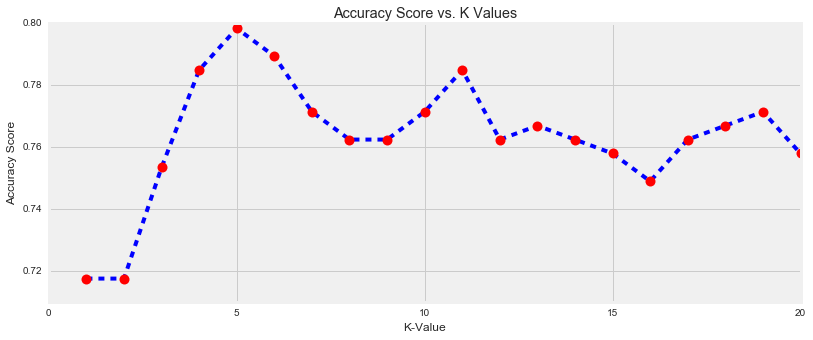

In [137]:
cnt = list(range(1,21))       # Range for the count of K-values
knn_score = []                # List to populate accurracy scores based on the K-value  

for i in cnt:                 # Loop to iterate through K-values, apply KNN Model and append the accuracy score to the list    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    kpred = knn.predict(X_test)
    score = accuracy_score(y_test,kpred)
    knn_score.append(score)

# Plotting the graph to dipict Accuracy Score vs. K-values

plt.figure(figsize=(12,5))
plt.plot(cnt,knn_score,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. K Values')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Score')

### Predictive Modelling Summary

Finally, we are done! Let's summarize the accuarcy values as been calculated above after applying different Machine Learning algorithms to determine the best algorithm / model for our Predictive Modelling.

{'KNN': 0.7982062780269058, 'SVM-Linear': 0.7488789237668162, 'SVM-rbc': 0.7982062780269058, 'DecisionTree': 0.78026905829596416, 'RandomForest': 0.78026905829596416, 'Logistic Reg': 0.78026905829596416}


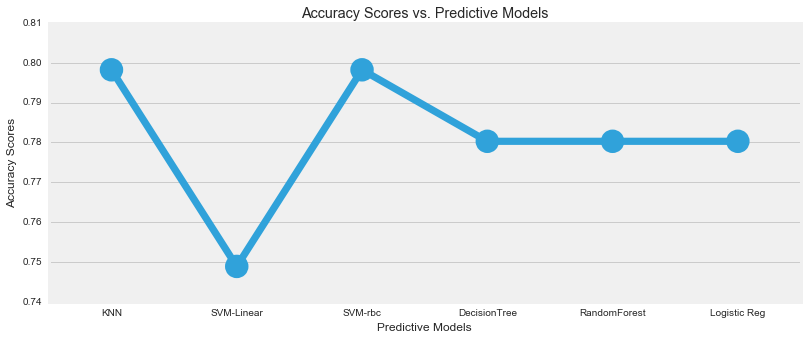

In [138]:
# Summarizing accuracy scores into a dictionery and plotting the graph
summary = {'Logistic Reg':accuracy_score(y_test,lr_pred),'DecisionTree':accuracy_score(y_test,dt_pred),\
           'RandomForest':accuracy_score(y_test,rfc_pred),'SVM-Linear':accuracy_score(y_test,sv_pred),\
           'SVM-rbc':accuracy_score(y_test,svr_pred),'KNN':accuracy_score(y_test,knn_pred)}
print(summary)
plt.figure(figsize=(12,5))
sns.pointplot(x=list(summary.keys()),y=list(summary.values()))
plt.title('Accuracy Scores vs. Predictive Models')
plt.xlabel('Predictive Models')
plt.ylabel('Accuracy Scores')

This clearly shows that out of all the models used above, ***"Support Vector Machines with rbc"*** and ***"Random Forest Classifier"*** are the best models. However, I will use ***"Support Vector Machines with rbc"*** model for Predictive Analysis of Titanic's Kaggle data **('test.csv')**.

## 8. Data Preparation and Submission for Kaggle Competition

Now that we have completed our analysis of the main data and have finalized the Machine Learning model, let prepare and submit the data for Kaggle competition ***"Titanic- Machine Learning from Disaster"***.


### Data Loading

Let's first load the ***test.csv*** data into **"test"** dataframe.

In [139]:
test = pd.read_csv('test.csv')    # Loading of 'test.csv' data file in 'test" dataframe
                                  # Please note that you need to adjust the file path according to the actual location

### Data Imputation, Feature Engineering & Data Cleanup
I have summarized all the codes that was used for missing data population, feature engineering and data clean-up of main data ***"train.csv"*** (that we used as **titanic dataset** above) all in one place.

In [140]:
# Missing data imputation, feature engineering and data cleanup

test.loc[test['Fare'].isnull(),'Fare'] = 35.63
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.',expand=True)  # Extract 'Title' from 'Name"
# Replacing titles to reduce overall times to Child, Mr, Mrs, Miss, and Other
test['Title'].replace(['Dona','Master','Rev','Col','Dr','Ms'],['Miss','Child','Other','Other','Other','Miss'],inplace=True)
test.groupby(['Title','Pclass'])['Age'].mean()   # Mean age based on "Title" and "Pclass"

#Function to populate missing values in test dataset
def test_age_fix(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    Title = cols[2]
    
    if pd.isnull(Age):
        
        if Pclass == 1 and Title == 'Child':
            return 10
        elif Pclass == 2 and Title == 'Child':
            return 5
        elif Pclass == 3 and Title == 'Child':
            return 7
        
        elif Pclass == 1 and Title == 'Miss':
            return 32
        elif Pclass == 2 and Title == 'Miss':
            return 17
        elif Pclass == 3 and Title == 'Miss':
            return 20
        
        elif Pclass == 1 and Title == 'Mr':
            return 41
        elif Pclass == 2 and Title == 'Mr':
            return 32
        elif Pclass == 3 and Title == 'Mr':
            return 27
        
        elif Pclass == 1 and Title == 'Mrs':
            return 46
        elif Pclass == 2 and Title == 'Mrs':
            return 33
        elif Pclass == 3 and Title == 'Mrs':
            return 30
        
        elif Pclass == 1 and Title == 'Other':
            return 51
        elif Pclass == 2 and Title == 'Other':
            return 36
              
        else:
            return Age
    else:
        return Age
    

test['Age'] = test[['Age','Pclass','Title']].apply(test_age_fix,axis=1) #The "test_age_fix" function is applied to "test" dataset

test['NAge'] = 0  # Create a new feature 'NAge' and assign initial value '0'

test.loc[test['Age']<=19.00,'NAge']=0
test.loc[(test['Age']>19.00)&(test['Age']<=26.00),'NAge']=1
test.loc[(test['Age']>26.00)&(test['Age']<=30.00),'NAge']=2
test.loc[(test['Age']>30.00)&(test['Age']<=40.00),'NAge']=3
test.loc[(test['Age']>40.00)&(test['Age']<=81.00),'NAge']=4

test['Child'] = 0    # Creates a new feature "Child" and assigns initial value '0'

# Assigns value '1' to all Children based on the above-mentioned criteria
test.loc[(test['Age'] <= 16) & (test['Title'] !='Mrs'),'Child'] = 1 

test['Deck'] = test['Cabin'].astype(str).str[0]  # Extracting first character in "Cabin" to create a new column "Deck"

test['IsCabin'] = 1 # Create a new feature "IsCabin" and assign a default value "1"

test.loc[test['Cabin'].isnull(),'IsCabin'] = 0  # Populate "IsCabin" with value '0' where "Cabin" is Null/NaN

#Creating new feature "FamSize" by adding values in "SibSp" and "Parch"

test['FamSize'] = test['SibSp'] + test['Parch'] 

test['Alone'] = 0  # Creating a new feature "Alone" with default value = 0

test.loc[test['FamSize']== 0,'Alone'] = 1  # Populate "Alone" with value '1' where family size is '0'

test['FareBins']=pd.qcut(test['Fare'],4)  # Divides data into equal bins

test['NFare'] = 0  # Creates a feature 'NFare' and assign an initial value '0'

# Now, let's assign a value (from 0 to 3) based on the *'FareBins'*

test.loc[test['Fare']<=7.91,'NFare']=0
test.loc[(test['Fare']>7.91)&(test['Fare']<=14.454),'NFare']=1
test.loc[(test['Fare']>14.454)&(test['Fare']<=31),'NFare']=2
test.loc[(test['Fare']>31)&(test['Fare']<=513),'NFare']=3

test['SharedTicket']= 0 # A new feature "FanTicket" created with initial value "0"

ticketV = test['Ticket'].value_counts()  #Calculates passengers groups on each tickets and assign it to a variable 'ticketV'

single = ticketV.loc[ticketV ==1].index.tolist()  # Creates a list of tickets used by individual(single) passemgers
multi  = ticketV.loc[ticketV > 1].index.tolist()  # Creates a list of tickets shared by group of passemgers

# Compares the ticket number in the "multi" list that was created above with test dataset "Ticket" feature and plugin '1'
for ticket in multi:
    test.loc[test['Ticket'] == ticket, 'SharedTicket'] = 1

emb  = pd.get_dummies(test['Embarked'],drop_first=True) #Creates two Dummy Varable "Q" and "C" and drops the values for "S"   
nsex = pd.get_dummies(test['Sex'],drop_first=True)     #Creates Dummy Varable "male" and drops the values for Female

test = pd.concat([test,emb],axis=1)  # Concatenate test dataset with emb
test = pd.concat([test,nsex],axis=1)  # Concatenate test dataset with nsex

test['Title'].replace(['Mr','Mrs','Miss','Child','Other'],[0,1,2,3,4],inplace=True)

test1 = test.copy()
# Removes unwanted features
test.drop(['Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked','Deck', 'FareBins']\
          ,inplace=True,axis=1) 


In [141]:
dsubmit = test.copy()    # Make a copy of test dataset as dsubmit that will be used for further processing
dsubmit.drop('PassengerId',inplace=True,axis=1)

Let's check the header of the **dsubmit** dataset

In [142]:
dsubmit.head(2)

,Pclass,Title,NAge,Child,IsCabin,FamSize,Alone,NFare,SharedTicket,Q,S,male
0,3,0,3,0,0,0,1,0,0,1,0,1
1,3,1,4,0,0,1,0,0,0,0,1,0


### Predictive Modelling

As mentioned above, we will be using **"Support Vector Machines with kernel rbf"** for predictive modelling. Moeover, we will apply full **titanic** dataset for model building, training and prediction.

In [143]:
# Creating trainX and trainY datasets using full titanic dataset
trainX = titanic.drop('Survived',axis=1)
trainY = titanic['Survived']

In [144]:
trainX.head(2)            # Header of trainX

,Pclass,Title,NAge,Child,IsCabin,FamSize,Alone,NFare,SharedTicket,Q,S,male
0,3,0,1,0,0,1,0,0,0,0,1,1
1,1,1,3,0,1,1,0,3,0,0,0,0


In [145]:
trainY.head(2)           # Header of trainY

0    0
1    1
Name: Survived, dtype: int64

### Model Training and Prediction

In [146]:
from sklearn.svm import SVC                 # Importing Support Vector Machine library from Scikit-Learn  
model = SVC(kernel='rbf')                   # Model building
model.fit(trainX,trainY)                    # Model training
kpred = model.predict(dsubmit)               # Prediction  

### Kaggle Submission
And finally, lets generate the csv file for Kaggle submission.

In [147]:
submit = pd.read_csv('gender_submission.csv')
submit.set_index('PassengerId',inplace=True)

submit['Survived'] = kpred
submit['Survived'] = submit['Survived'].apply(int)
submit.to_csv('submit_titanic.csv')

This submission got a score of **78.947%** which is not exactly what I was expecting. I expected to gain at least 80%. I will keep improving this Notebook. Hence, more to come!

Thanks so much for your time in getting this far and I would really appreciate your valuable feedback and suggestions.

### Acknowledgements

Some of the concepts in this Notebook are inspired by the great work done by the following Kaggle submitters. 

   - https://www.kaggle.com/ash316/eda-to-prediction-dietanic
   - https://www.kaggle.com/headsortails/pytanic
   - https://www.kaggle.com/omarelgabry/a-journey-through-titanic

Moreover, special thanks to Jose Portilla from whom I have learned most of Machine Learning.

   - https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/learn/v4/overview
